In [2]:
import os

import seaborn as sns

import numpy as np
import pandas as pd

import civis
import civis.io

In [117]:
DB = 'Bernie DS'
state = 'CO'

modes = ['cell', 'land']


sql_cell = f"""select s.*, 
                      raf.race_5way,
                      raf.gender_2way,
                      raf.education_2way,
                      c.pickup_last
               from bernie_cherdeman.final_cell_scores_percentiles s
               join bernie_data_commons.rainbow_analytics_frame raf using(person_id)
               left join bernie_cherdeman.contactibility_cell c on c.person_id::int = raf.person_id::int
               where s.state_code = '{state}'"""

sql_land = f"""select s.*, 
                      raf.race_5way,
                      raf.gender_2way,
                      raf.education_2way
               from bernie_cherdeman.final_land_scores_percentiles s
               join bernie_data_commons.rainbow_analytics_frame raf using(person_id)
               left join bernie_cherdeman.contactibility_land c on c.person_id::int = raf.person_id::int
               where s.state_code = '{state}'"""

df_cell = civis.io.read_civis_sql(sql_cell, database=DB, use_pandas=True)
df_land = civis.io.read_civis_sql(sql_land, database=DB, use_pandas=True)

#rmf.female, 
# rmf.age_continuous,
# rmf.civis_2020_race_black,
# rmf.civis_2020_race_latinx,
# rmf.less_than_bach, 
# rmf.vote_new_reg, 
# rmf.years_registered_1year, 
# rmf.years_registered_2_3years

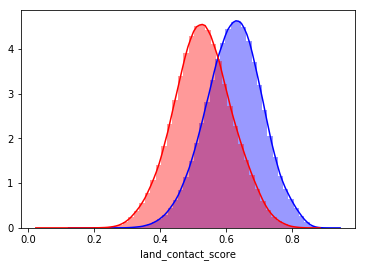

In [118]:
# Unadjusted Distributions
sns.distplot(df_cell['cell_contact_score'], norm_hist = True, color='blue')
sns.distplot(df_land['land_contact_score'], norm_hist = True, color = 'red')

In [119]:
df_land['ntile'] = pd.cut(df_land['land_score_percentile'],bins=10)
df_cell['ntile'] = pd.cut(df_cell['cell_score_percentile'],bins=10)

In [120]:
demos = ['ntile','race_5way', 'cell_contact_score', 'pickup_last']

In [121]:
df_cell[demos].head()

,ntile,race_5way,cell_contact_score,pickup_last
0,"(0.6, 0.7]",1 - White,0.659202,NaN
1,"(0.2, 0.3]",2 - Black,0.567894,NaN
2,"(0.5, 0.6]",1 - White,0.636883,NaN
3,"(0.5, 0.6]",1 - White,0.646810,0.0
4,"(0.9, 1.0]",1 - White,0.766221,NaN


In [124]:
#df_cell_race = df_cell[df_cell['race_5way'] == '2 - Black']
df_cell[demos].groupby(['ntile','race_5way']).count()

cell_contact_score  pickup_last
ntile         race_5way                                  
(-0.001, 0.1] 1 - White               212469        55533
              2 - Black                18103         7129
              3 - Latinx               58295        28956
              4 - Asian                 7543         1952
              5 - Native                 356          149
              6 - Other                   58            5
(0.1, 0.2]    1 - White               219414        40523
              2 - Black                14686         4135
              3 - Latinx               41900        15392
              4 - Asian                 6066         1163
              5 - Native                 259           67
              6 - Other                  364            5
(0.2, 0.3]    1 - White               226538        32446
              2 - Black                13156         2985
              3 - Latinx               36378        11017
              4 - Asian                 5624          993
              5 - Native                 235           57
              6 - Other                  759            4
(0.3, 0.4]    1 - White               231665        26623
              2 - Black                11904         2279
              3 - Latinx               32400         8522
              4 - Asian                 5439          842
              5 - Native                 190           46
              6 - Other                 1092            6
(0.4, 0.5]    1 - White               236251        22057
              2 - Black                10207         1633
              3 - Latinx               29573         6641
              4 - Asian                 5154          693
              5 - Native                 188           34
              6 - Other                 1316            7
(0.5, 0.6]    1 - White               240556        18233
              2 - Black                 8886         1255
              3 - Latinx               26598         5111
              4 - Asian                 4955          545
              5 - Native                 169           28
              6 - Other                 1526            0
(0.6, 0.7]    1 - White               244574        14746
              2 - Black                 7356          856
              3 - Latinx               24446         3818
              4 - Asian                 4655          485
              5 - Native                 129           18
              6 - Other                 1530            2
(0.7, 0.8]    1 - White               248261        12235
              2 - Black                 5765          606
              3 - Latinx               22410         2978
              4 - Asian                 4547          387
              5 - Native                 115           10
              6 - Other                 1592            3
(0.8, 0.9]    1 - White               252655        10236
              2 - Black                 3947          353
              3 - Latinx               20186         2063
              4 - Asian                 4375          287
              5 - Native                 113           12
              6 - Other                 1413            0
(0.9, 1.0]    1 - White               246766         6886
              2 - Black                 1875          112
              3 - Latinx               15063         1087
              4 - Asian                 3897          164
              5 - Native                  52            1
              6 - Other                  903            0

In [82]:
df_cell[demos].groupby('race_5way').agg(['mean'])

ValueError: no results

In [59]:
df_cell[demos].groupby('ntile').agg(['mean'])

,female,age_continuous,civis_2020_race_black,civis_2020_race_latinx,less_than_bach,vote_new_reg,years_registered_1year,years_registered_2_3years
,mean,mean,mean,mean,mean,mean,mean,mean
ntile,,,,,,,,
"(-0.001, 0.1]",0.807592,50.065660,0.187045,0.281984,0.790532,0.004302,0.002988,0.020163
"(0.1, 0.2]",0.732056,49.859846,0.183766,0.266296,0.751665,0.008964,0.006274,0.037668
"(0.2, 0.3]",0.691948,50.031181,0.171223,0.256533,0.729628,0.013058,0.009276,0.052443
"(0.3, 0.4]",0.648795,50.281813,0.155637,0.248672,0.713697,0.017450,0.012348,0.068689
"(0.4, 0.5]",0.599728,50.486689,0.140422,0.242019,0.702226,0.022791,0.016402,0.086038
"(0.5, 0.6]",0.550061,50.635412,0.126488,0.234138,0.690825,0.030166,0.021753,0.107695
"(0.6, 0.7]",0.495712,50.707037,0.112991,0.226098,0.680200,0.039424,0.028958,0.131744
"(0.7, 0.8]",0.438251,50.652622,0.101367,0.216481,0.667589,0.054157,0.040750,0.159867


In [57]:
df_cell[demos].head()

,ntile,female,age_continuous,civis_2020_race_black,civis_2020_race_latinx,less_than_bach,vote_new_reg,years_registered_1year,years_registered_2_3years
0,"(0.4, 0.5]",1,48,0.026291,0.045051,0,0,0,0
1,"(0.1, 0.2]",1,45,0.590230,0.123865,1,0,0,0
2,"(0.1, 0.2]",1,58,0.051277,0.846571,1,0,0,0
3,"(0.2, 0.3]",0,59,0.190860,0.023037,1,0,0,0
4,"(0.4, 0.5]",1,75,0.017265,0.013688,1,0,0,0


In [13]:
df_land['adj_score'] = df_land['land_contact_score']*(df_cell['cell_contact_score'].mean()/df_land['land_contact_score'].mean())

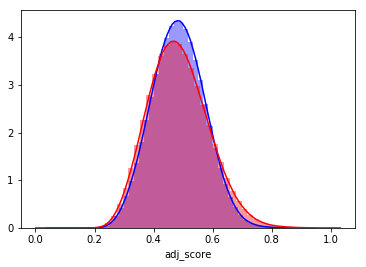

In [16]:
# Adjusted Distributions
sns.distplot(df_cell['cell_contact_score'], norm_hist = True, color='blue')
sns.distplot(df_land['adj_score'], norm_hist = True, color = 'red')

In [125]:
df_cell_outcomes = df_cell[~df_cell['pickup_last'].isna()]
df_cell_outcomes.loc[df_cell_outcomes['cell_score_percentile'] >= 0.5, 'predicted'] = 1
df_cell_outcomes.loc[df_cell_outcomes['cell_score_percentile'] < 0.5, 'predicted'] = 0
#df_cell[~df_cell['pickup_last'].isna()].groupby('pickup_last').count()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [126]:
df_cell_outcomes.head()

,person_id,state_code,cell_contact_score,instate_rank,state_count,cell_score_percentile,race_5way,gender_2way,education_2way,pickup_last,ntile,predicted
3,100006266,CO,0.646810,1697005,2826897,0.60,1 - White,2 - Men,1 - Bachelors or higher,0.0,"(0.5, 0.6]",1.0
17,100040614,CO,0.554680,601378,2826897,0.21,1 - White,1 - Women,2 - Less than Bachelors,0.0,"(0.2, 0.3]",0.0
42,100107810,CO,0.587090,938298,2826897,0.33,3 - Latinx,2 - Men,2 - Less than Bachelors,0.0,"(0.3, 0.4]",0.0
67,100172328,CO,0.669633,1981203,2826897,0.70,3 - Latinx,2 - Men,1 - Bachelors or higher,0.0,"(0.6, 0.7]",1.0
84,100019292,CO,0.530596,407751,2826897,0.14,1 - White,1 - Women,1 - Bachelors or higher,0.0,"(0.1, 0.2]",0.0


In [127]:
df_cell_outcomes[df_cell_outcomes['race_5way'] == '1 - White'][['pickup_last', 'predicted', 'state_code']].groupby(['pickup_last', 'predicted']).count()

state_code
pickup_last predicted            
0.0         0.0            165917
            1.0             59578
1.0         0.0              9239
            1.0              4784

In [128]:
df_cell_outcomes[df_cell_outcomes['race_5way'] == '3 - Latinx'][['pickup_last', 'predicted', 'state_code']].groupby(['pickup_last', 'predicted']).count()

state_code
pickup_last predicted            
0.0         0.0             66303
            1.0             14342
1.0         0.0              3620
            1.0              1320

In [129]:
df_cell_outcomes[df_cell_outcomes['race_5way'] == '2 - Black'][['pickup_last', 'predicted', 'state_code']].groupby(['pickup_last', 'predicted']).count()

state_code
pickup_last predicted            
0.0         0.0             17104
            1.0              3036
1.0         0.0               947
            1.0               256